<ins>Logical Workflow PA Project</ins>

0. Call Data from SQL Server and save to local .pkl. Filter by TBM 1 and time span ('2022/02/01', '2022/04/01')
1. Join data for a complete dataset
2. Initial drop duplicates, Filter (by Equipment ID: TBM 1 and remove Trial Recipes), key generation, cycle time generation and EDA

In [1]:
import pandas as pd
from collections import Counter
from helpers import TBM, bcolors, Data_Functions
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DF = Data_Functions()
TBM = TBM()
p = bcolors()

In [2]:
df_tbm = pd.read_pickle("./pkl/df_tbm_master.pkl")
df_alarm = pd.read_pickle("./pkl/df_alarm_master.pkl")
df_map = pd.read_pickle("./pkl/df_map_master.pkl")

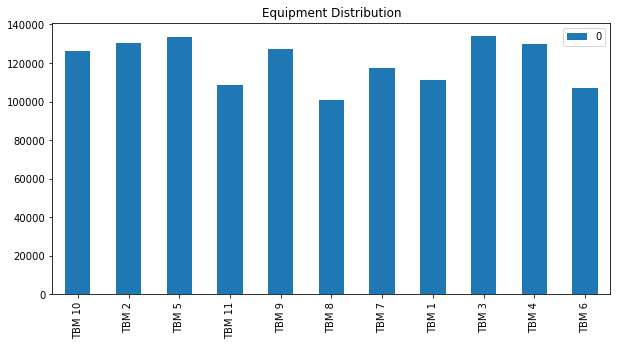

In [4]:
# Explore the Equipment Distribution in the TBM data
TBM.plot_counter(df_tbm, 'EquipmentID', 'Equipment Distribution')

In [6]:
# Discard the Trial Recipes
df_tbm = df_tbm[df_tbm.RecipeName.astype(str).str[0] != 'X']

In [7]:
#Ensure data is just for TBM 1
df_map = df_map[df_map['EquipmentID'] == 'TBM 1']
df_tbm = df_tbm[df_tbm.EquipmentID == 'TBM 1']
df_alarm = df_alarm[df_alarm['EquipmentID'] == 'TBM 1']
# Rename the dataframe to readable names
df_tbm = TBM.rename_df(df_tbm)
# View head of dataFrame
df_tbm.head(6)

,ProducedOn,EquipmentID,ProductionDataId,UserGroupName,Name_of_Active_Operator,RecipeName,Name_of_Active_Production_Order,date/time,Barcode_on_build_tire,GT_Code_of_the_built_tire,...,VRL_VHMC_MES_CCPR_CYCLE_TIME_STITCH_FC,VRL_VHMC_MES_CCPR_CYCLE_TIME_RSAP,VRL_VHMC_MES_CCPR_CYCLE_TIME_STITCH_RS,VRL_VHMC_MES_CCPR_CYCLE_TIME_BDSG,VRL_VHMC_MES_CCPR_CYCLE_TIME_RLCY,VRL_VHMC_MES_CCPR_CYCLE_TIME_SHAPE,VRL_VHMC_MES_CCPR_CYCLE_TIME_TDST,VRL_VHMC_MES_CCPR_CYCLE_TIME_SWST,VRL_VHMC_MES_CCPR_CYCLE_TIME_GTRU,Id
37,2022-02-01 06:02:06,TBM 1,1347467,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:02:06,0015600675,GG224517HYPXY,...,NaN,0.0,0.0,1.007,4.465,21.613001,5.799,0.0,2.482,11141584
38,2022-02-01 06:03:43,TBM 1,1347468,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:03:43,0015600676,GG224517HYPXY,...,NaN,0.0,0.0,4.030,4.463,34.310001,5.498,0.0,2.480,11141585
39,2022-02-01 06:04:28,TBM 1,1347469,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:04:28,0015600677,GG224517HYPXY,...,NaN,0.0,0.0,1.008,4.459,5.160000,5.667,0.0,2.480,11141586
41,2022-02-01 06:05:33,TBM 1,1347470,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:05:33,0015600678,GG224517HYPXY,...,NaN,0.0,0.0,1.048,4.424,5.258000,5.654,0.0,2.397,11141588
43,2022-02-01 06:06:24,TBM 1,1347471,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:06:24,0015600679,GG224517HYPXY,...,NaN,0.0,0.0,1.025,4.473,5.113000,5.572,0.0,2.448,11141590
44,2022-02-01 06:07:52,TBM 1,1347472,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:07:52,0015600680,GG224517HYPXY,...,NaN,0.0,0.0,1.032,4.434,5.114000,5.718,0.0,2.468,11141591


In [8]:
p.printc(f'Number of Green Tyres Produced in TimeSpan: {p.ENDC} {df_tbm.ProducedOn.nunique()}')

Number of Green Tyres Produced in TimeSpan:  110579


In [9]:
# Create cycle times for GT's using shift method
df_tbm_cycle = TBM.cycle_time_looper(df_tbm)
df_tbm_cycle.head()

,ProducedOn,EquipmentID,ProductionDataId,UserGroupName,Name_of_Active_Operator,RecipeName,Name_of_Active_Production_Order,date/time,Barcode_on_build_tire,GT_Code_of_the_built_tire,...,VRL_VHMC_MES_CCPR_CYCLE_TIME_STITCH_RS,VRL_VHMC_MES_CCPR_CYCLE_TIME_BDSG,VRL_VHMC_MES_CCPR_CYCLE_TIME_RLCY,VRL_VHMC_MES_CCPR_CYCLE_TIME_SHAPE,VRL_VHMC_MES_CCPR_CYCLE_TIME_TDST,VRL_VHMC_MES_CCPR_CYCLE_TIME_SWST,VRL_VHMC_MES_CCPR_CYCLE_TIME_GTRU,Id,start_time,cycle_time_s
0,2022-02-01 06:03:43,TBM 1,1347468,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:03:43,0015600676,GG224517HYPXY,...,0.0,4.030,4.463,34.310001,5.498,0.0,2.480,11141585,2022-02-01 06:02:06,97
1,2022-02-01 06:04:28,TBM 1,1347469,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:04:28,0015600677,GG224517HYPXY,...,0.0,1.008,4.459,5.160000,5.667,0.0,2.480,11141586,2022-02-01 06:03:43,45
2,2022-02-01 06:05:33,TBM 1,1347470,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:05:33,0015600678,GG224517HYPXY,...,0.0,1.048,4.424,5.258000,5.654,0.0,2.397,11141588,2022-02-01 06:04:28,65
3,2022-02-01 06:06:24,TBM 1,1347471,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:06:24,0015600679,GG224517HYPXY,...,0.0,1.025,4.473,5.113000,5.572,0.0,2.448,11141590,2022-02-01 06:05:33,51
4,2022-02-01 06:07:52,TBM 1,1347472,Operator,Operator 065,GG224517HYPXY,T2206001N000,20220201 06:07:52,0015600680,GG224517HYPXY,...,0.0,1.032,4.434,5.114000,5.718,0.0,2.468,11141591,2022-02-01 06:06:24,88


In [8]:
percent = 65
p.printc(f'The {percent}\'th percentile in Cycle Time (s): {p.ENDC} {np.percentile(df_tbm_cycle.cycle_time_s.to_list(), percent)}')

The 65'th percentile in Cycle Time (s):  48.0


Text(0.5, 1.0, 'Percentile of Cycle Time (Unfiltered by SKU)')

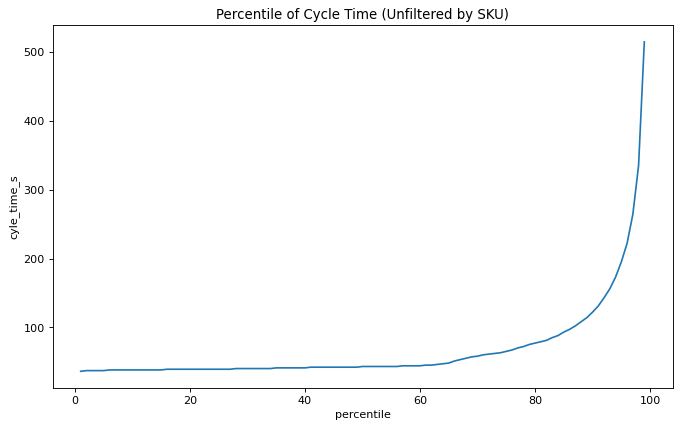

In [9]:
DF.percentile_plotter(df_tbm_cycle, 'cycle_time_s')
plt.title('Percentile of Cycle Time (Unfiltered by SKU)')

In [10]:
top10 = df_tbm_cycle.groupby('RecipeName').count().ProducedOn.sort_values(ascending=False).head(10).index.tolist()

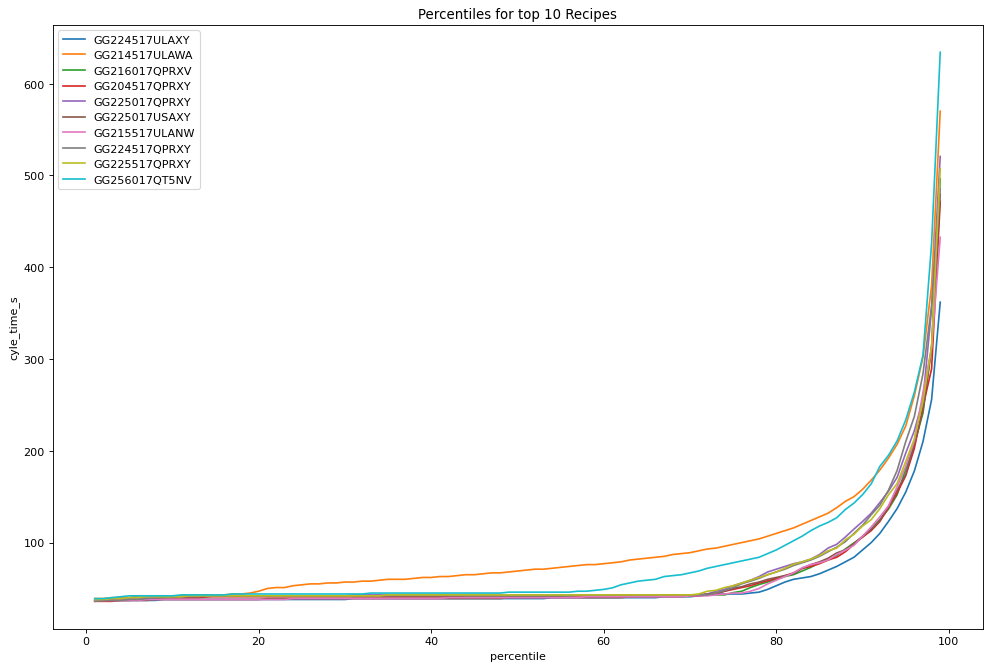

In [11]:
DF.list_percetile_plotter(list=top10, df=df_tbm_cycle, column='cycle_time_s')

c:\Users\shav.vimelindiran\Anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
c:\Users\shav.vimelindiran\Anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


Text(0.5, 1.0, 'Rough initial view of Overall Cycle times (NOT sorted by SKU)')

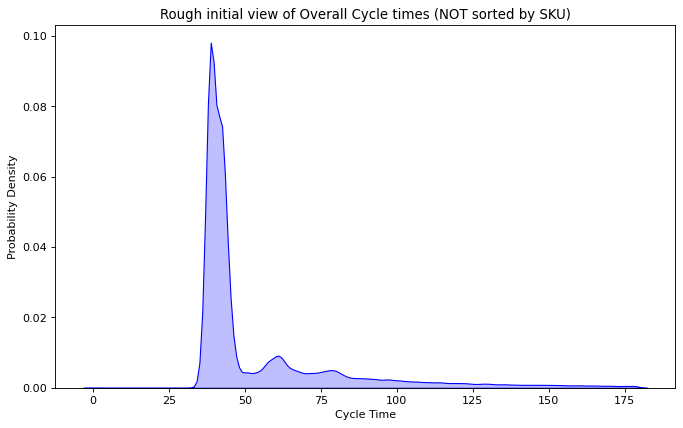

In [12]:
plt.figure(figsize=(10, 6), dpi=80)

# Rough initial view of Overall Cycle times. These are not sorted by RecipeName so this will be done later
# Plotting the KDE Plot
sns.kdeplot(df_tbm_cycle.cycle_time_s[df_tbm_cycle.cycle_time_s < 180], color='b', shade=True, Label='Cycle_Time', bw_adjust=.4)
# sns.kdeplot(alarm_join.loc[(alarm_join['Name']=='PRE-ASSEMBLY, LENGTH OUT OF TOLERANCE'),'Duration'][alarm_join.loc[(alarm_join['Name']=='PRE-ASSEMBLY, LENGTH OUT OF TOLERANCE'),'Duration'] > 100], color='r', shade=True, Label='PRE_ASSEMBLY_LENGTH_OUT_OF_TOLERANCE')

# Setting the X and Y Label
plt.xlabel('Cycle Time')
plt.ylabel('Probability Density')
plt.title('Rough initial view of Overall Cycle times (NOT sorted by SKU)')

(0.5, 10.5)

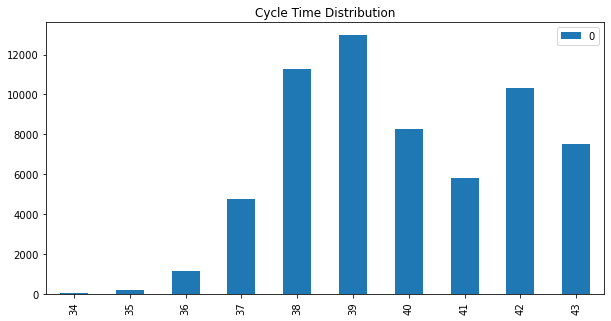

In [13]:
cycle_time_s_Count = Counter(df_tbm_cycle['cycle_time_s'].tolist())
df = pd.DataFrame.from_dict(cycle_time_s_Count, orient='index')
df.sort_index(inplace=True)
ax = df.plot(kind='bar', figsize=(10, 5), title="Cycle Time Distribution", xlim=(0, 20))
ax.set_xlim(0.5, 10.5)

In [14]:
p.printc(f'Number of total unique Alarm names for TBM 1: {p.ENDC} {len(df_map["Name"].unique())}')

Number of total unique Alarm names for TBM 1:  8310


In [12]:
# Generate an artifical Key as Message ID's are not really unique, they represent differnt alarms depending on TBM
df_map["key"] = (df_map["MessageID"].astype(str) + df_map["EquipmentID"]).replace(' ', '_', regex=True)
df_alarm["key"] = (df_alarm["MessageID"].astype(str) + df_alarm["EquipmentID"]).replace(' ', '_', regex=True)

In [16]:
df_map.to_pickle("./pkl/df_map_filtered_key.pkl")
df_alarm.to_pickle("./pkl/df_alarm_filtered_key.pkl")
df_tbm_cycle.to_pickle("./pkl/df_tbm_filtered_cycle_times.pkl")